In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("./modules/") # for d3plus2

sys.path.append("./../Hidalgo_Haussmann") # for HH tools
from HH_tools import *

import d3plus2 as d3plus

import numpy as np

In [13]:
path = './../growth-lab-diversity/data/sources/'
agglevel_titles = pd.read_csv(path+'agglevel_titles.csv')
area_titles = pd.read_csv(path+'area_titles.csv')
industry_titles = pd.read_csv(path+'industry_titles.csv')
industry_titles =  pd.DataFrame([['POPESTIMATE2010','Population']], columns = industry_titles.columns).append(industry_titles).reset_index(drop = True)
industry_titles =  pd.DataFrame([['Cropland','Cropland'],
                                ['Desert','Desert'],
                                ['Grassland','Grassland'],
                                ['Other','Other'],
                                ['Woodland','Woodland'],
                                ['Urban','Urban'],
                                ['Water','Water']], columns = industry_titles.columns).append(industry_titles).reset_index(drop = True)

In [14]:
path = './../growth-lab-diversity/data/sources/BLS/'

uc = ['area_fips', 'industry_code', 'agglvl_code', 'year', 'annual_avg_estabs', 'annual_avg_emplvl', 'total_annual_wages']

df_list = []
for y in np.arange(2006, 2016):
    df_y = pd.read_csv(path+str(y)+'_annual_singlefile.zip', usecols = uc, low_memory=False)
    df_list += [df_y]
    
df = pd.concat(df_list)

In [15]:
# Get robustness from using 10 years

variable = 'annual_avg_estabs'
#correct possible mistakes, index should be like c-p-y
cpy_ix = df.loc[df.agglvl_code == 76].groupby(['year', 'area_fips', 'industry_code'])[[variable]].sum()
year_avg = cpy_ix.reset_index().drop('year', axis = 1).groupby(['area_fips', 'industry_code'])[[variable]].mean()
# summary_var = df_2015.drop('year', axis = 1).loc[df_2015.agglvl_code == 76].groupby(['area_fips', 'industry_code'])[[variable]].sum()
X = year_avg.unstack()[variable]


In [16]:
X.shape

(3279, 319)

### Population and land uses

In [17]:
# Add population

county_LU = pd.read_csv('./data/US_land_use/land_use_frac.csv', index_col=0)
county_LU.index = county_LU.index.astype(str).str.zfill(5)

In [18]:
# plt.hist(log10(county_LU['Woodland']).dropna(), 50)
# plt.show()

In [19]:
# Add population

county_pop = pd.read_csv('./data/co-est2017-alldata.csv', encoding = 'latin-1')
county_pop['area_fips'] = county_pop.STATE.astype(str).str.zfill(2) + county_pop.COUNTY.astype(str).str.zfill(3)

county_pop = county_pop[['area_fips', 'POPESTIMATE2010']].set_index('area_fips')

In [20]:
X = pd.concat([county_pop.loc[X.index], county_LU.loc[X.index], X], axis = 1, sort = True)#.dropna()

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  if __name__ == '__main__':


In [10]:
# # Check sparsity / small areas
# # df_ = summary_var.groupby('area_fips').count().sort_values(by = variable)
# # pd.concat([df_, industry_titles.set_index('industry_code')], axis = 1, sort = False)
# # pd.concat([df_, area_titles.set_index('area_fips')], axis = 1, sort = False).dropna()

# # # Check what different choices do. 
# # # Final recommendation, take logs, don't fill gaps and use min periods >~ 20. (meth_3)

# # meth_1 = log10(summary_var.unstack()[variable]).fillna(-2).cov()
# # meth_2 = log10(summary_var.unstack()[variable]).fillna(-1).cov()
# # meth_3 = log10(summary_var.unstack()[variable]).cov(min_periods = 20).fillna(0)

# # plt.hist(meth_1.values.flatten().clip(-100, 1000), 100, linewidth = 0, alpha = .4)
# # plt.hist(meth_2.values.flatten().clip(-100, 1000), 100, linewidth = 0, alpha = .4)
# # plt.hist(meth_3.values.flatten().clip(-100, 1000), 100, linewidth = 0, alpha = .4)
# # plt.show()

# # x = meth_2.iloc[40] # meth_2.stack()
# # y = meth_3.iloc[40] # meth_3.stack()
# # plt.plot(x.values, y.values, marker = '.', alpha = .2, linewidth = 0)

# # M = log10(X)
# # M = (M.T - M.T.mean()).T

# cor_mat = log10(X).corr(min_periods = 20) # M -->log10(X)
# cov_mat = log10(X).cov(min_periods = 20)

# # We should be able to compare this to pearson correlation. 
# # However, removing area mean is necesary for this but note that row/col means are ill defined cause of logs of missing data... 
# # Here covariance can be compared to Pearson and plotted directly. It seems cov ~ pears^2

# # XTX = log10(X).T.fillna(0).dot(log10(X).fillna(0))
# # norm = np.sqrt(np.square(XTX).sum())
# # XTX = XTX.div(norm, axis = 0).div(norm) # this would convert it to Pearson if it was centered

# x = cor_mat.stack()
# y = cov_mat.stack()
# fig, ax = plt.subplots(1, figsize = (10, 10))
# ax.plot(x.values, y.values, marker = '.', alpha = .002, linewidth = 0)
# # ax.plot(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)**2)
# ax.set_xlim(-.2, 1.1); ax.set_ylim(-.2, 1.1); #ax.set_ylim(0, 0.00001)
# ax.set_xlabel('Correlation'); ax.set_ylabel('Covariance')

In [21]:
cor_mat = log10(X).corr(min_periods = 20)
cov_mat = log10(X).cov(min_periods = 20)

./../Hidalgo_Haussmann/HH_tools.py:58: RuntimeWarning: divide by zero encountered in log10
  return np.log10(df).replace(-np.inf, np.nan)


In [8]:
def demean(Z):
    Z = Z.fillna(0)
    means = Z.mean()
    return (Z.T - means).T - means + means.mean()

def stand(Z):
    Z = Z.fillna(0)
    std = Z.std()
    return Z.T.div(std).T.div(std)

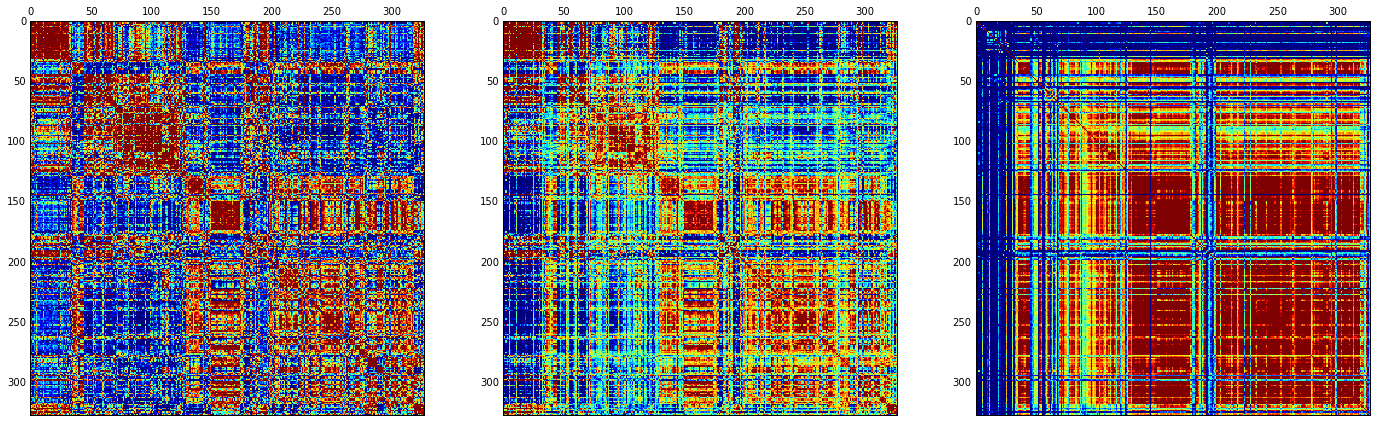

In [13]:
# mat = demean(cor_mat.fillna(0))
# mat = cor_mat
fig, axs = plt.subplots(1, 3, figsize = (24, 8))

axs[0].matshow(demean(stand(demean(cor_mat))), vmin = -10, vmax = 10)
axs[1].matshow(demean(cor_mat), vmin = -.1, vmax = .1)
axs[2].matshow(cor_mat.fillna(0), vmin = .2, vmax = .7)

# plt.hist(stand(demean(cor_mat)).std(), 30)
# plt.show()

In [28]:
# Try spectral clustering. Works when matrix is demeaned
from sklearn.cluster import SpectralClustering
X_ = demean(cor_mat).values
clustering = SpectralClustering(n_clusters=10,
        assign_labels="discretize",
        random_state=0).fit(X_)

pd.options.display.max_rows = 500
clust_result = pd.DataFrame(clustering.labels_, index = X.columns, columns = ['cluster'])
clust_result = pd.concat([clust_result, industry_titles.set_index('industry_code')], axis = 1, sort = False).dropna().sort_values(by = ['cluster', 'industry_title'])

/home/miglesia/anaconda2/lib/python2.7/site-packages/sklearn/cluster/spectral.py:442: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn("The spectral clustering API has changed. ``fit``"


In [29]:
edges = pd.DataFrame(demean(cor_mat).stack(), columns = ['dem_corr'])
# > demean(cor_mat).values, 90
# edges.loc[]
edges_s = edges.loc[edges.dem_corr > edges.dem_corr.quantile(.9)]
edges_s.index.names = ['industry_code_x', 'industry_code_y']
edges_s = edges_s.reset_index().merge(
    industry_titles, left_on = 'industry_code_x', right_on = 'industry_code').merge(
    industry_titles, left_on = 'industry_code_y', right_on = 'industry_code').T.drop_duplicates().T
edges_s['dem_corr'] = edges_s['dem_corr'].astype(float)

In [30]:
# #Load modules
# from numpy.random import choice 
# from numpy import where, power

In [31]:
import matplotlib.colors as mcolors

# nodes = industry_titles

nodes_size = pd.DataFrame(np.sqrt(X.sum()), columns=['sqrt_size'])
nodes = pd.concat([nodes_size, clust_result], axis = 1, sort = False)

norm = mcolors.Normalize(vmin=0, vmax=10, clip=True)
mapper = plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.jet)

nodes['color'] = nodes['cluster'].apply(lambda x: mcolors.rgb2hex(mapper.to_rgba(x)))

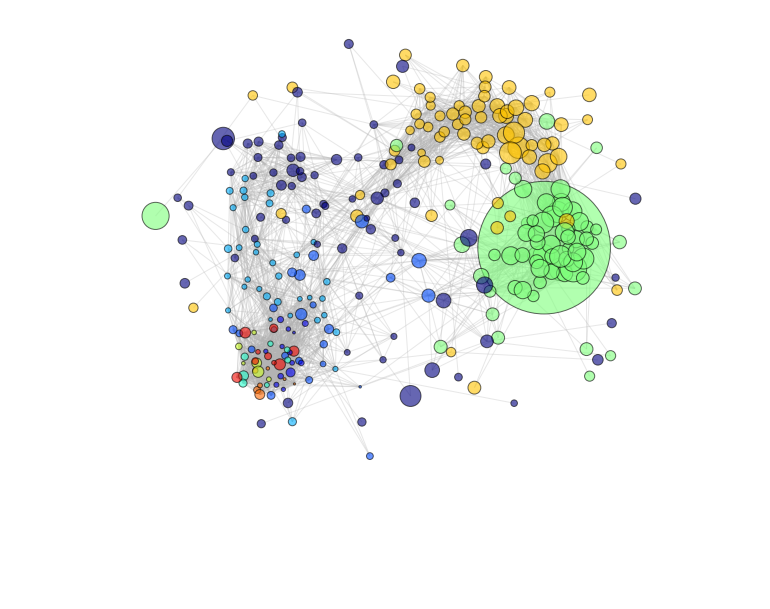

In [32]:
max_d = 40
weight_column = 'dem_corr' #'weight_'+geo

        ### Max degree = max_d. Parameter used to trim the network.
df1 = edges_s.groupby('industry_code_x').apply(lambda x: x.nlargest(max_d, weight_column)).reset_index(drop = True)
df2 = edges_s.groupby('industry_code_y').apply(lambda x: x.nlargest(max_d, weight_column)).reset_index(drop = True)
edges_max_d = df1.merge(df2, on = ['industry_code_x', 'industry_title_x', 'industry_code_y', 'industry_title_x', weight_column]).reset_index(drop = True)

###

# Hard threshold and max degree backboning

G = nx.from_pandas_edgelist(edges_max_d, 'industry_code_x', 'industry_code_y', weight_column)


plt.figure(figsize = (10, 8))

G = max(nx.connected_component_subgraphs(G), key=len)
nodes_s = nodes.loc[G.nodes.keys()]
pos = nx.spring_layout(G, k=.4)

nx.draw(G, pos, node_size = nodes_s.sqrt_size.values, alpha=.6, node_color= list(nodes_s.color.values), edgelist = [])
nx.draw_networkx_edges(G, pos, edge_color='.7', alpha=.3)
# plt.title('max_d = '+str(max_d))
#     plt.savefig('./Figures/5_max_deg/'+col_name+'_plot1.png')
#             plt.show()

plt.show()

### Draw in d3plus

In [33]:
# nodes
pos_df = pd.DataFrame(pos, index = ['x', 'y']).T
nodes_wpos = pd.concat([nodes_s, pos_df], axis = 1, sort = False)

In [22]:
nodes_ = nodes_wpos.reset_index()[['index','x', 'y', 'industry_title', 'color']].dropna(subset = ['x']).rename({'index': 'id'}, axis = 1)
nodes_['id'] = nodes_['id'].astype(str).str.zfill(4)
nodes_[['x', 'y']] = 500 * nodes_[['x', 'y']]


In [23]:
nodes_.head()

id           x           y  \
0  1142 -293.361488  103.995559   
1  5173   39.184259 -229.002257   
2  1141 -257.538874  115.312692   
3  3335   80.137288  349.054824   
4  5175 -174.146817  338.822663   

                                      industry_title    color  
0                    NAICS 1142 Hunting and trapping  #0000f1  
1  NAICS 5173 Wired and wireless telecommunicatio...  #ffc400  
2                                 NAICS 1141 Fishing  #004cff  
3    NAICS 3335 Metalworking machinery manufacturing  #000080  
4  NAICS02 5175 Cable and other program distribution  #000080

In [24]:
# nodes_.sort_values(by = 'id')#.loc[nodes_.id == 'Desert']

In [25]:
import sys
sys.path.append("./../Hidalgo_Haussmann") # for HH tools
import pandas as pd
from HH_tools import robust_proximity, year_to_tp, RCA

In [4]:
nodes_['presence'] = True

edges_max_d['edge_tuple'] = list(zip(edges_max_d.industry_code_x, edges_max_d.industry_code_y))
edges_max_d['edge_tuple_rev'] = list(zip(edges_max_d.industry_code_y, edges_max_d.industry_code_x))
edges_max_d_triangles = edges_max_d.loc[edges_max_d.edge_tuple.isin(G.edges()) | edges_max_d.edge_tuple_rev.isin(G.edges())]

links = edges_max_d_triangles.reset_index().rename({weight_column: 'strength'},axis = 1)
links['target'] = links['industry_code_y'].astype(str).str.zfill(4)
links['source'] = links['industry_code_x'].astype(str).str.zfill(4)

# links = nc_backbone.reset_index().rename({'score': 'strength'},axis = 1)
# links['target'] = links['trg'].astype(str).str.zfill(4)
# links['source'] = links['src'].astype(str).str.zfill(4)

network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'
# network

NameError: name 'nodes_' is not defined

In [27]:
## Conditional coloring

# Manufacturing (light_blue) and services (yellow)
nodes_['color_mfg_srv'] = 'D3D3D3' #Gray bckg

conditions = [
    (nodes_['industry_title'].str.lower().str.contains('manufacturing')) + (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (nodes_['industry_title'].str.lower().str.contains('service')),# or (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (nodes_['industry_title'].str.lower().str.contains('wholesale')),# or (nodes_['industry_title'].str.lower().str.contains('mfg')),
    (-nodes_['industry_title'].str.lower().str.contains('naics'))]

choices = ['#000080', '#ffc400', '#00b0ff', '#000000']

nodes_['color_mfg_srv'] = np.select(conditions, choices, default='#D3D3D3')


/home/miglesia/anaconda2/lib/python2.7/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [28]:
edges_max_d_triangles.to_csv('edges_max_d_triangles.csv', index = False)

In [29]:
ps = d3plus.ProductSpace(
id="name",
name="industry_title",
color="color_mfg_srv",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

./modules/d3plus2.py:260: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  return data.rename_axis({self.id: self.network_id}, axis=1)


<IPython.core.display.Javascript object>

In [3]:
ps = d3plus.ProductSpace(
id="name",
name="industry_title",
color="color",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

NameError: name 'network' is not defined

### Activities by cluster

In [31]:
pd.set_option('display.max_colwidth', -1)
summary = nodes.loc[nodes.industry_title.str.contains('NAICS')].groupby('cluster').agg({'industry_title': 'first', 'color':[ 'first', 'count']})
summary.columns = ['color', 'node_count','example']
summary.sort_index()#.sort_values(by = 'node_count')

color  node_count  \
cluster                        
0.0      #000080  80           
1.0      #0000f1  12           
2.0      #004cff  22           
3.0      #00b0ff  36           
4.0      #29ffce  6            
5.0      #7dff7a  69           
6.0      #ceff29  6            
7.0      #ffc400  76           
8.0      #ff6800  3            
9.0      #f10800  9            

                                                     example  
cluster                                                       
0.0      NAICS 1152 Support activities for animal production  
1.0      NAICS 1142 Hunting and trapping                      
2.0      NAICS 1114 Greenhouse and nursery production         
3.0      NAICS 2212 Natural gas distribution                  
4.0      NAICS 1125 Aquaculture                               
5.0      NAICS 2361 Residential building construction         
6.0      NAICS 2111 Oil and gas extraction                    
7.0      NAICS 2362 Nonresidential building construction      
8.0      NAICS 1111 Oilseed and grain farming                 
9.0      NAICS 1112 Vegetable and melon farming

In [41]:
nodes_['color'].value_counts().index

Index([u'#000080', u'#ffc400', u'#7dff7a', u'#00b0ff', u'#004cff', u'#0000f1',
       u'#f10800', u'#29ffce', u'#ff6800', u'#ceff29'],
      dtype='object')

In [39]:
# land-use clusters
nodes_.loc[nodes_['color'].isin(['#f10800', '#ff6800', '#ceff29', '#29ffce'])].sort_values(by = ['color','industry_title'])

#population cluster
nodes_.loc[nodes_['color'].isin(['#7dff7a'])].sort_values(by = ['color','industry_title'])

#'yellow' services cluster
nodes_.loc[nodes_['color'].isin(['#ffc400'])].sort_values(by = ['color','industry_title'])

#state/public sector cluster
# nodes_.loc[nodes_['color'].isin(['#004cff'])].sort_values(by = ['color','industry_title'])

#others/mfg clusters
# nodes_.loc[nodes_['color'].isin(['#000080', '#0000f1', '#00b0ff'])].sort_values(by = ['industry_title'])

# coastal?
# nodes_.loc[nodes_['color'].isin(['#0000f1'])].sort_values(by = ['color','industry_title'])

id           x           y  \
220  2362  157.354238 -271.642255   
295  2371  238.892922 -298.058920   
163  2372  327.589669 -297.054932   
63   4231  88.356353   66.327222    
62   4232  16.781534  -133.564381   
61   4233  83.000137  -49.455987    
60   4234 -0.830071   -260.307852   
58   4236 -38.794446  -176.628802   
160  4237  73.657742  -180.494937   
128  4239 -267.461085 -405.184685   
237  4241  37.306150  -101.311983   
235  4242 -10.587614  -167.197606   
236  4243 -33.191807  -60.474002    
232  4246  107.753624 -152.437694   
230  4248 -28.376398  -117.145673   
271  4251  92.141798  -206.665749   
296  4512  49.439040  -2.975407     
170  4541 -45.331784  -276.130279   
274  4853 -0.337368   -338.014367   
43   4881  108.194022 -277.139947   
47   4885  273.128933 -159.343337   
248  4921 -192.089541  76.323869    
247  4922 -329.920922 -249.768993   
229  5111 -149.361693 -240.324306   
231  5112 -64.310168  -125.178615   
146  5121 -35.641906  -176.822601   
1    5173  39.184259  -229.002257   
8    5179  6.530445   -157.975043   
305  5182 -41.002865  -231.756535   
203  5191 -122.539231 -247.194017   
215  5222  147.346808 -228.474456   
214  5223 -89.720156  -194.290393   
187  5231 -60.816874  -243.709499   
181  5239 -15.524803  -242.997725   
154  5241 -76.546019  -120.747074   
141  5321  4.586182   -173.766977   
155  5324  201.029599 -414.404832   
169  5331 -52.882050  -131.126426   
115  5413  148.487428 -203.501901   
109  5414  25.557189  -217.976955   
270  5415  49.433494  -202.527385   
111  5416  83.095846  -216.342801   
112  5417 -29.371034  -156.086495   
7    5418  3.217078   -230.089034   
121  5419  136.675430 -208.205878   
57   5511  10.867835  -245.873210   
73   5611 -57.167320  -198.383201   
71   5613  38.975844  -221.084227   
76   5614  7.636240   -248.452513   
77   5615 -17.126800  -281.048590   
136  5616  64.572960  -249.811740   
66   5619 -53.693261  -303.467557   
269  6113 -58.220486  -214.472706   
78   6114 -56.779590  -228.756793   
201  6115 -258.673017 -184.425533   
300  6116  85.210275  -175.836925   
89   6117 -25.676350  -174.483413   
222  6215  38.619825  -263.016918   
221  6216 -195.156315 -187.132550   
204  7111 -76.905644  -155.271210   
65   7113 -102.250490 -214.918052   
90   7115 -46.180054  -200.237440   
79   7223 -182.387911 -324.062527   
174  8112  21.587214  -236.175949   
140  8129  118.036751 -256.018819   
107  8132 -6.896797    40.626077    
108  8133  70.616820  -41.443135    
268  5161 -69.831787  -106.093087   
211  5181 -88.778200  -162.238889   
24   5172  178.890181 -220.993920   

                                                industry_title    color  \
220  NAICS 2362 Nonresidential building construction            #ffc400   
295  NAICS 2371 Utility system construction                     #ffc400   
163  NAICS 2372 Land subdivision                                #ffc400   
63   NAICS 4231 Motor vehicle and parts merchant wholesalers    #ffc400   
62   NAICS 4232 Furniture and furnishing merchant wholesalers   #ffc400   
61   NAICS 4233 Lumber and const. supply merchant wholesalers   #ffc400   
60   NAICS 4234 Commercial equip. merchant wholesalers          #ffc400   
58   NAICS 4236 Appliance and electric goods merchant whls.     #ffc400   
160  NAICS 4237 Hardware and plumbing merchant wholesalers      #ffc400   
128  NAICS 4239 Misc. durable goods merchant wholesalers        #ffc400   
237  NAICS 4241 Paper and paper product merchant wholesalers    #ffc400   
235  NAICS 4242 Druggists' goods merchant wholesalers           #ffc400   
236  NAICS 4243 Apparel and piece goods merchant wholesalers    #ffc400   
232  NAICS 4246 Chemical merchant wholesalers                   #ffc400   
230  NAICS 4248 Alcoholic beverage merchant wholesalers         #ffc400   
271  NAICS 4251 Electronic markets and agents and brokers       #ffc400   
296  NAICS 4512 Book stores and news dealers                    #ffc400   
170  NAICS 4541 Electronic sh

### Keywords by cluster

In [33]:
# Cluster 7, #ffc400 are 76 nodes that follow neither population nor land resources. Then what is it all about?
from collections import Counter
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

from IPython.display import display, HTML
import colorlover as cl    
    
for clsr in range(10):
    try:
        
        text = nodes.loc[nodes.cluster == clsr]['industry_title']

        r1 = text.str.lower().str.split().values
        r1 = [item for sublist in r1 for item in sublist]

        r1_f = [w.replace(',', '').replace('mfg.', 'manufacturing') for w in r1 if not w in stop_words] 

        print(summary.loc[clsr])
        color = summary.loc[clsr]['color']
        display(HTML(cl.to_html( [tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))] )))
        print(Counter(r1_f).most_common()[:10])
        print('\n')
    except:
        pass

color         #000080                                            
node_count    80                                                 
example       NAICS 1152 Support activities for animal production
Name: 0.0, dtype: object


[('naics', 79), ('manufacturing', 33), ('product', 11), ('equipment', 6), ('transportation', 4), ('general', 4), ('machinery', 4), ('facilities', 3), ('merchant', 3), ('furniture', 3)]


color         #0000f1                        
node_count    12                             
example       NAICS 1142 Hunting and trapping
Name: 1.0, dtype: object


[('naics', 12), ('transportation', 3), ('mills', 3), ('product', 2), ('manufacturing', 2), ('1142', 1), ('coastal', 1), ('4245', 1), ('packaging', 1), ('raw', 1)]


color         #004cff                                     
node_count    22                                          
example       NAICS 1114 Greenhouse and nursery production
Name: 2.0, dtype: object


[('naics', 22), ('transportation', 4), ('water', 3), ('manufacturing', 3), ('production', 2), ('activities', 2), ('scenic', 2), ('sightseeing', 2), ('mining', 2), ('administration', 2)]


color         #00b0ff                            
node_count    36                                 
example       NAICS 2212 Natural gas distribution
Name: 3.0, dtype: object


[('naics', 36), ('manufacturing', 19), ('product', 7), ('transportation', 5), ('steel', 3), ('mills', 3), ('equipment', 3), ('production', 2), ('motor', 2), ('vehicle', 2)]


color         #29ffce               
node_count    6                     
example       NAICS 1125 Aquaculture
Name: 4.0, dtype: object


[('naics', 6), ('operations', 1), ('activities', 1), ('mining', 1), ('logging', 1), ('3211', 1), ('1133', 1), ('1131', 1), ('woodland', 1), ('1125', 1)]


color         #7dff7a                                     
node_count    69                                          
example       NAICS 2361 Residential building construction
Name: 5.0, dtype: object


[('naics', 65), ('stores', 17), ('services', 9), ('care', 7), ('building', 5), ('offices', 4), ('goods', 4), ('contractors', 4), ('activities', 3), ('supplies', 3)]


color         #ceff29                          
node_count    6                                
example       NAICS 2111 Oil and gas extraction
Name: 6.0, dtype: object


[('naics', 6), ('oil', 2), ('transportation', 2), ('gas', 2), ('pipeline', 2), ('9271', 1), ('technology', 1), ('2131', 1), ('3365', 1), ('support', 1)]


color         #ffc400                                        
node_count    76                                             
example       NAICS 2362 Nonresidential building construction
Name: 7.0, dtype: object


[('naics', 72), ('services', 23), ('merchant', 12), ('wholesalers', 12), ('related', 5), ('goods', 4), ('support', 4), ('telecommunications', 4), ('carriers', 4), ('equipment', 4)]


color         #ff6800                             
node_count    3                                   
example       NAICS 1111 Oilseed and grain farming
Name: 8.0, dtype: object


[('naics', 3), ('farming', 2), ('1111', 1), ('mining', 1), ('2122', 1), ('oilseed', 1), ('ore', 1), ('1122', 1), ('metal', 1), ('cropland', 1)]


color         #f10800                               
node_count    9                                     
example       NAICS 1112 Vegetable and melon farming
Name: 9.0, dtype: object


[('naics', 9), ('farming', 5), ('crop', 2), ('production', 2), ('forest', 2), ('gathering', 1), ('1121', 1), ('nut', 1), ('1123', 1), ('1124', 1)]




### Map distribution from different clusters

In [37]:
# nodes
import geopandas as gpd

counties = gpd.read_file('./data/cb_2017_us_county_500k/cb_2017_us_county_500k.shp')
counties['area_fips'] = counties.STATEFP + counties.COUNTYFP


In [38]:
### A little trick. Distribution of neigbors of node 'Naics 5417 Scientific Research and Development Services'
# nodes_.loc[nodes_.id == '5417']
ego_node = 'Desert' #'Cropland' #'POPESTIMATE2010'# '5417'

neigh = edges_max_d_triangles.loc[(edges_max_d_triangles.industry_code_x == ego_node) |
                                  (edges_max_d_triangles.industry_code_y == ego_node)]
neigh_ids = list(set(neigh['industry_code_x'].unique()).union(set(neigh['industry_code_y'].unique())))
# nodes_.loc[nodes_.id.isin(neigh_ids)]['id'].values

node_ids = neigh_ids

In [89]:
# gdf.loc[gdf.industry_code == naics]['annual_avg_estabs']
# df_neigh
# df_neigh.groupby('industry_code').mean().sort_values(by = 'annual_avg_estabs').tail(5).index

In [118]:
from PIL import Image, ImageDraw, ImageFont


id          x           y  \
234  4245 -32.847762  229.037585   

                                        industry_title    color  presence  \
234  NAICS 4245 Farm product raw material merch. whls.  #0000f1  True       

    color_mfg_srv  
234  #D3D3D3

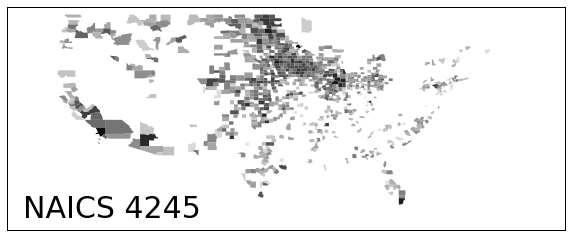

id          x           y           industry_title    color  presence  \
293  3132 -53.366874  201.355326  NAICS 3132 Fabric mills  #0000f1  True       

    color_mfg_srv  
293  #D3D3D3

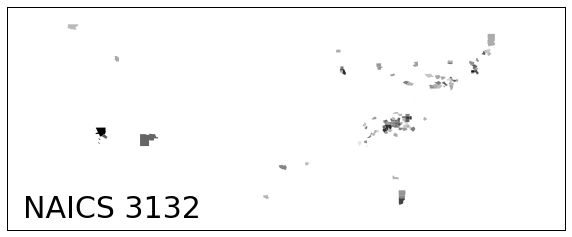

id           x           y  \
38  4831 -114.104692  196.642265   

                                             industry_title    color  \
38  NAICS 4831 Sea, coastal, and great lakes transportation  #0000f1   

    presence color_mfg_srv  
38  True      #D3D3D3

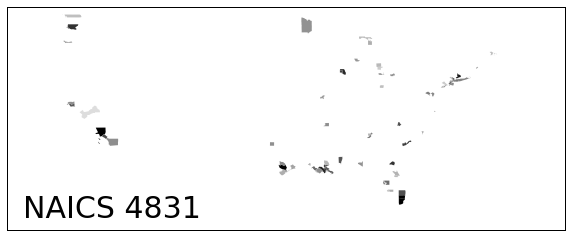

id          x           y  \
291  3117 -39.045221  211.840058   

                                           industry_title    color  presence  \
291  NAICS 3117 Seafood product preparation and packaging  #0000f1  True       

    color_mfg_srv  
291  #D3D3D3

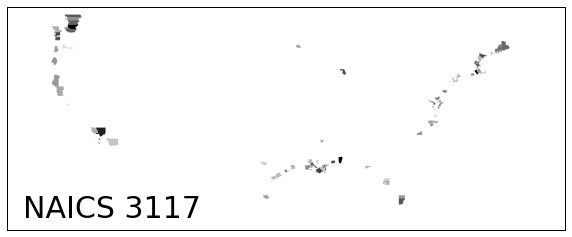

id          x          y                          industry_title  \
217  4832 -79.817968  274.86972  NAICS 4832 Inland water transportation   

       color  presence color_mfg_srv  
217  #0000f1  True      #D3D3D3

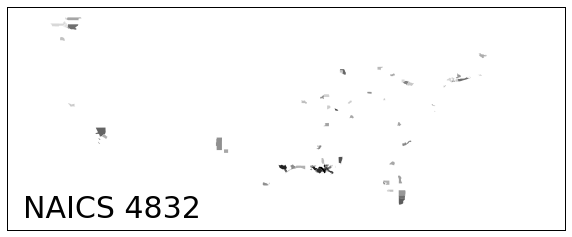

id          x           y  \
275  4251 -19.102435 -255.521179   

                                           industry_title    color  presence  \
275  NAICS 4251 Electronic markets and agents and brokers  #ffc400  True       

    color_mfg_srv  
275  #D3D3D3

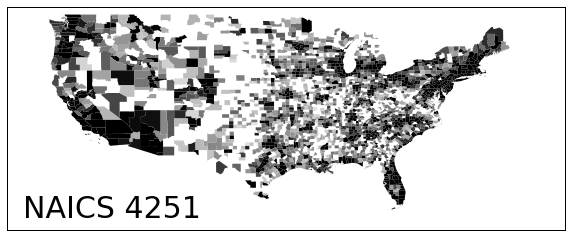

id          x           y  \
111  5416 -12.974656 -237.109908   

                                              industry_title    color  \
111  NAICS 5416 Management and technical consulting services  #ffc400   

     presence color_mfg_srv  
111  True      #ffc400

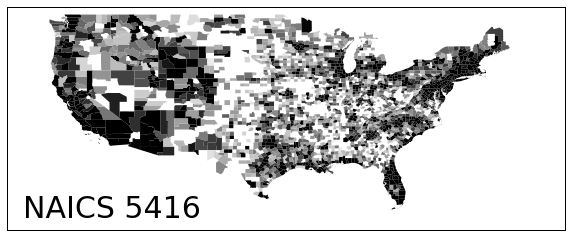

id          x           y  \
110  5415 -20.498189 -216.919714   

                                              industry_title    color  \
110  NAICS 5415 Computer systems design and related services  #ffc400   

     presence color_mfg_srv  
110  True      #ffc400

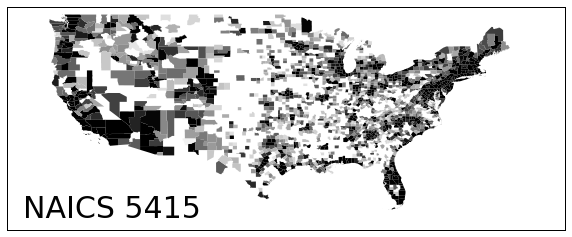

id          x           y  \
115  5413  95.522395 -227.943463   

                                        industry_title    color  presence  \
115  NAICS 5413 Architectural and engineering services  #ffc400  True       

    color_mfg_srv  
115  #ffc400

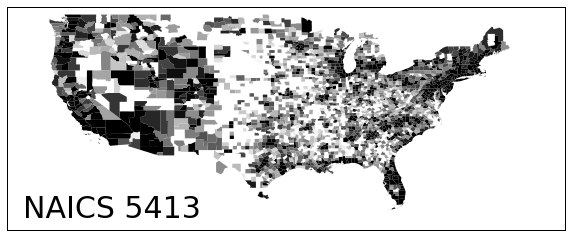

id          x          y                  industry_title    color  \
70  5613 -47.963904 -232.96971  NAICS 5613 Employment services  #ffc400   

    presence color_mfg_srv  
70  True      #ffc400

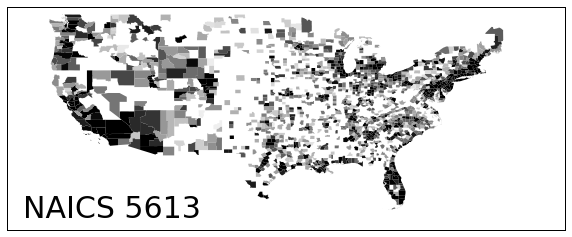

id           x          y             industry_title    color  \
245  4911  168.627464  75.157914  NAICS 4911 Postal service  #004cff   

     presence color_mfg_srv  
245  True      #ffc400

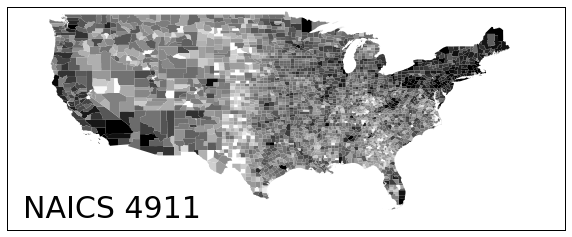

id          x          y  \
282  9211  154.18731  91.364403   

                                               industry_title    color  \
282  NAICS 9211 Executive, legislative and general government  #004cff   

     presence color_mfg_srv  
282  True      #D3D3D3

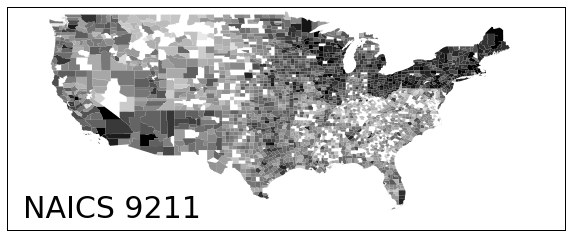

id           x           y  \
246  9221  142.563344  189.377397   

                                              industry_title    color  \
246  NAICS 9221 Justice, public order, and safety activities  #004cff   

     presence color_mfg_srv  
246  True      #D3D3D3

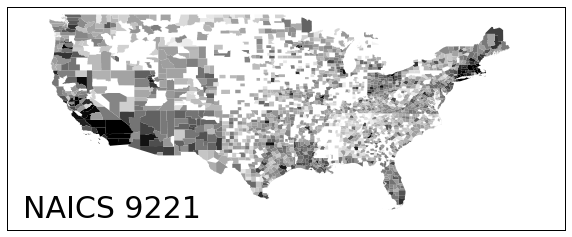

id           x           y  \
263  1114  155.554176  263.783155   

                                   industry_title    color  presence  \
263  NAICS 1114 Greenhouse and nursery production  #004cff  True       

    color_mfg_srv  
263  #D3D3D3

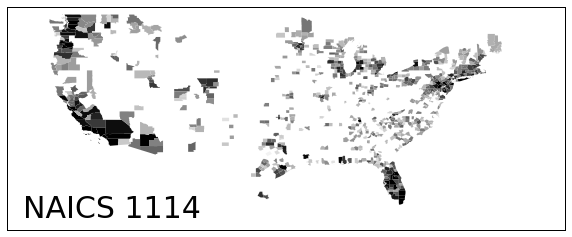

id          x           y                              industry_title  \
208  2213  94.781039  310.043546  NAICS 2213 Water, sewage and other systems   

       color  presence color_mfg_srv  
208  #004cff  True      #D3D3D3

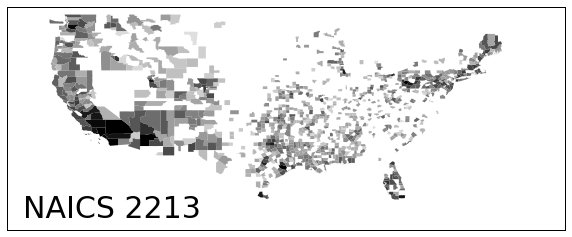

id           x           y           industry_title    color  presence  \
98  9999 -146.488784  337.394639  NAICS 9999 Unclassified  #000080  True       

   color_mfg_srv  
98  #D3D3D3

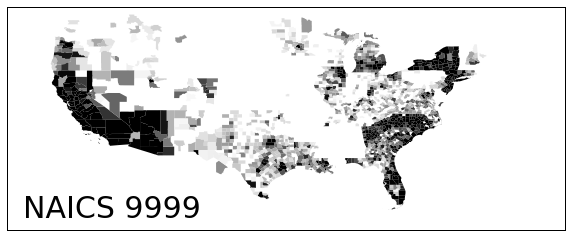

id          x          y                             industry_title  \
34  6241  17.601837  458.67884  NAICS 6241 Individual and family services   

      color  presence color_mfg_srv  
34  #000080  True      #ffc400

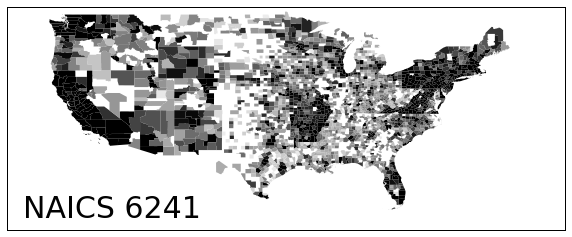

id           x           y                       industry_title  \
268  4841  191.146072 -286.673287  NAICS 4841 General freight trucking   

       color  presence color_mfg_srv  
268  #000080  True      #D3D3D3

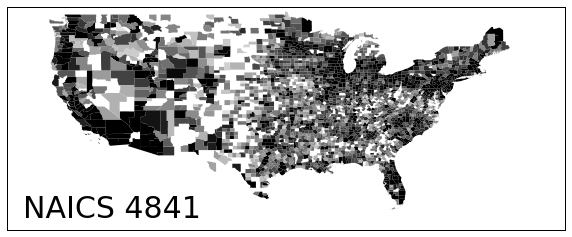

id           x           y                           industry_title  \
269  4842  229.160747 -243.750869  NAICS 4842 Specialized freight trucking   

       color  presence color_mfg_srv  
269  #000080  True      #D3D3D3

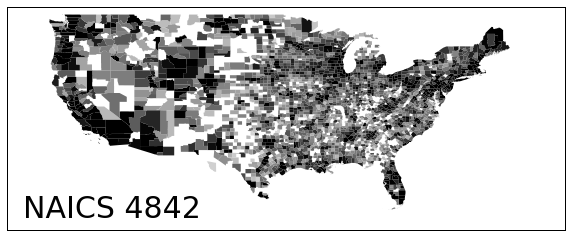

id           x          y  \
86  7224  257.461809  26.229721   

                                     industry_title    color  presence  \
86  NAICS 7224 Drinking places, alcoholic beverages  #000080  True       

   color_mfg_srv  
86  #D3D3D3

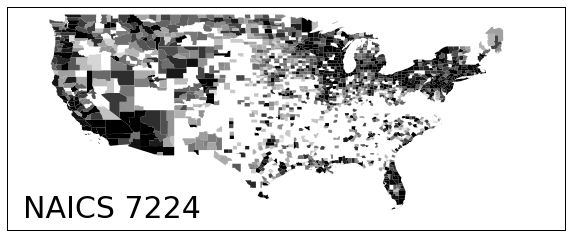

id          x           y  \
292  3116 -36.217712  341.808154   

                                    industry_title    color  presence  \
292  NAICS 3116 Animal slaughtering and processing  #00b0ff  True       

    color_mfg_srv  
292  #D3D3D3

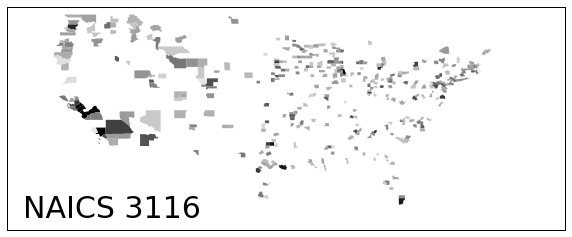

id           x           y                       industry_title  \
209  2212 -143.504284  252.937033  NAICS 2212 Natural gas distribution   

       color  presence color_mfg_srv  
209  #00b0ff  True      #D3D3D3

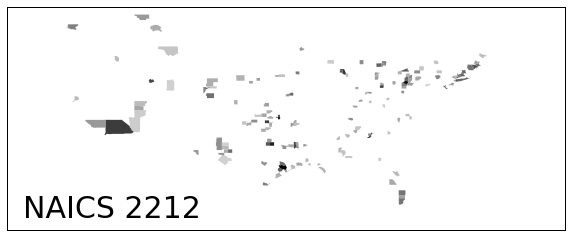

id          x          y                   industry_title    color  \
12  3321 -57.403532  65.154924  NAICS 3321 Forging and stamping  #00b0ff   

    presence color_mfg_srv  
12  True      #D3D3D3

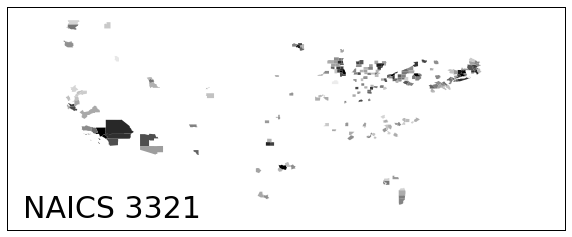

id         x           y  \
172  3362 -5.299697  189.291347   

                                              industry_title    color  \
172  NAICS 3362 Motor vehicle body and trailer manufacturing  #00b0ff   

     presence color_mfg_srv  
172  True      #000080

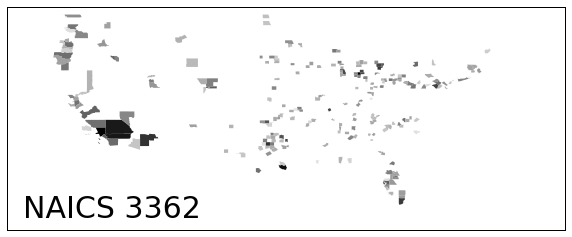

id        x          y                           industry_title  \
139  3262 -43.2043  57.903822  NAICS 3262 Rubber product manufacturing   

       color  presence color_mfg_srv  
139  #00b0ff  True      #000080

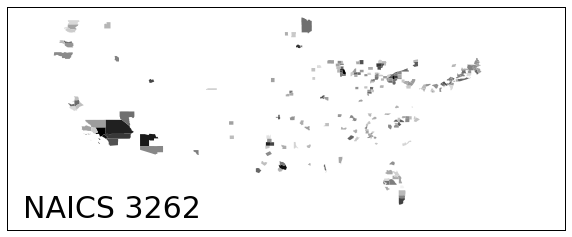

id           x           y                 industry_title    color  \
41  8141 -308.656091  424.340419  NAICS 8141 Private households  #7dff7a   

    presence color_mfg_srv  
41  True      #D3D3D3

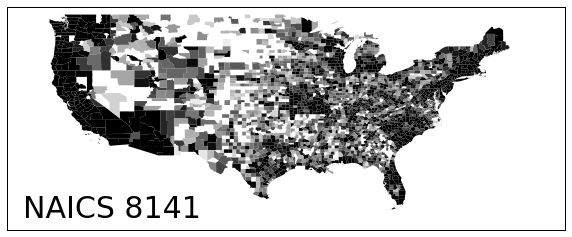

id           x           y  \
84  7225  233.424182 -137.900118   

                                    industry_title    color  presence  \
84  NAICS 7225 Restaurants and other eating places  #7dff7a  True       

   color_mfg_srv  
84  #D3D3D3

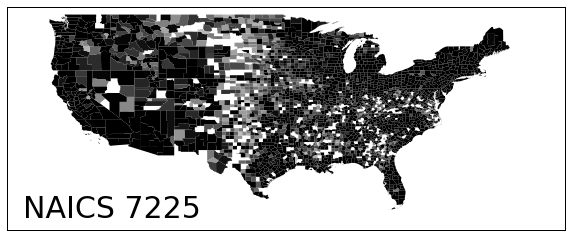

id           x           y                              industry_title  \
14  7222  276.706339 -172.229545  NAICS07 7222 Limited-service eating places   

      color  presence color_mfg_srv  
14  #7dff7a  True      #ffc400

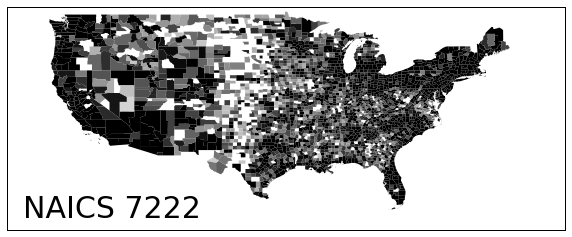

id           x           y                         industry_title  \
11  7221  258.057475 -136.843725  NAICS07 7221 Full-service restaurants   

      color  presence color_mfg_srv  
11  #7dff7a  True      #ffc400

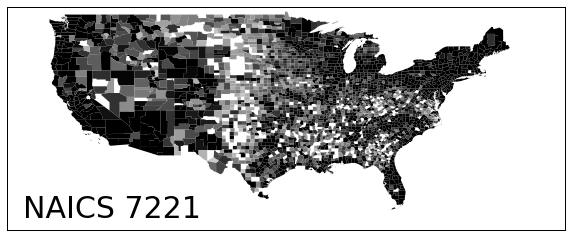

id           x           y                             industry_title  \
125  2382  163.983236 -208.767182  NAICS 2382 Building equipment contractors   

       color  presence color_mfg_srv  
125  #7dff7a  True      #D3D3D3

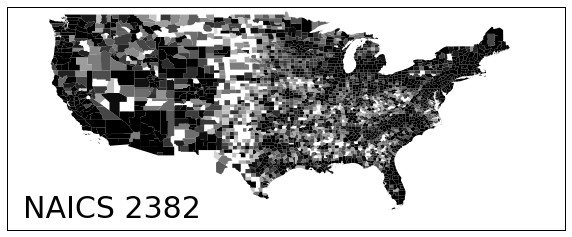

id          x           y      industry_title    color  presence  \
131  1133  13.533484  272.049594  NAICS 1133 Logging  #29ffce  True       

    color_mfg_srv  
131  #D3D3D3

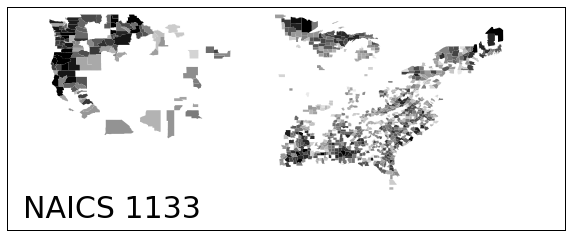

id         x           y                             industry_title  \
205  3211  6.540994  218.308773  NAICS 3211 Sawmills and wood preservation   

       color  presence color_mfg_srv  
205  #29ffce  True      #D3D3D3

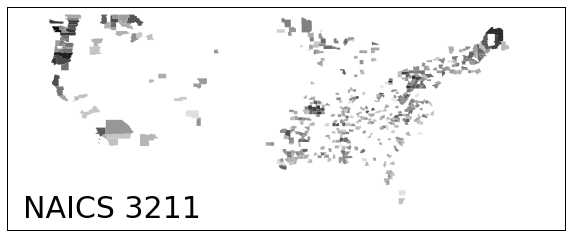

id         x           y                              industry_title  \
47  1153 -6.913179  318.857086  NAICS 1153 Support activities for forestry   

      color  presence color_mfg_srv  
47  #29ffce  True      #D3D3D3

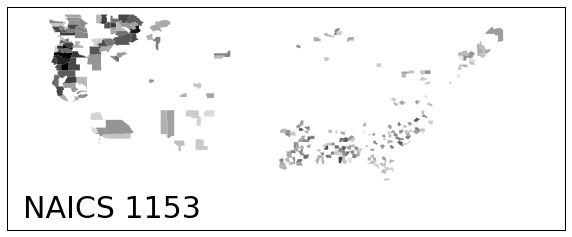

id          x           y          industry_title    color  presence  \
285  2121  37.036163  192.575877  NAICS 2121 Coal mining  #29ffce  True       

    color_mfg_srv  
285  #D3D3D3

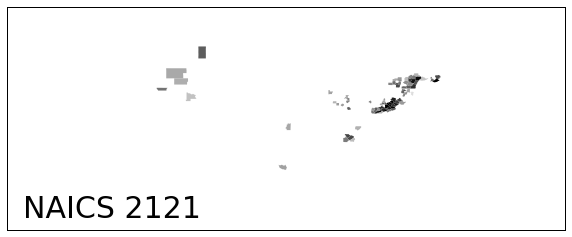

id         x           y          industry_title    color  presence  \
96  1125 -6.991721  280.053575  NAICS 1125 Aquaculture  #29ffce  True       

   color_mfg_srv  
96  #D3D3D3

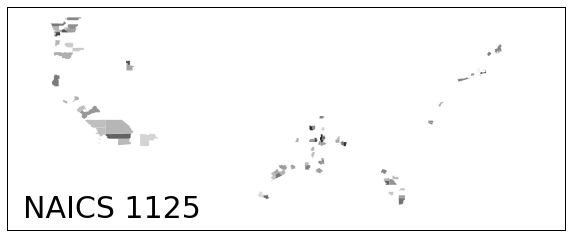

id          x           y                            industry_title  \
251  2131 -61.797195  250.509232  NAICS 2131 Support activities for mining   

       color  presence color_mfg_srv  
251  #ceff29  True      #D3D3D3

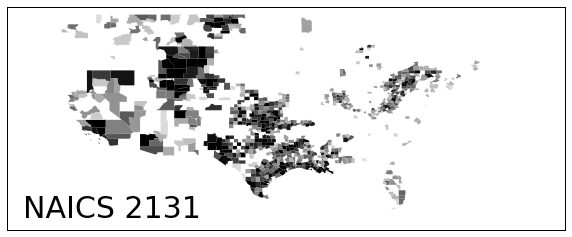

id         x          y                     industry_title    color  \
195  2111 -31.55291  284.86462  NAICS 2111 Oil and gas extraction  #ceff29   

     presence color_mfg_srv  
195  True      #D3D3D3

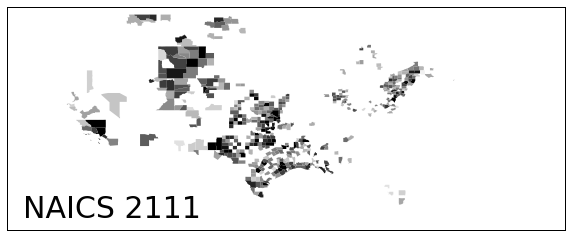

id          x           y  \
33  4862 -29.259338  267.129198   

                                       industry_title    color  presence  \
33  NAICS 4862 Pipeline transportation of natural gas  #ceff29  True       

   color_mfg_srv  
33  #D3D3D3

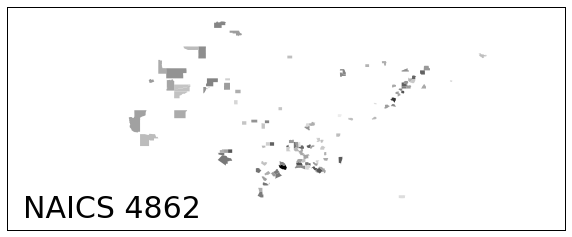

id          x           y  \
36  4861 -39.384754  274.762458   

                                     industry_title    color  presence  \
36  NAICS 4861 Pipeline transportation of crude oil  #ceff29  True       

   color_mfg_srv  
36  #D3D3D3

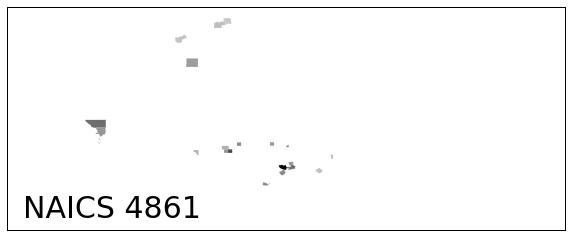

id          x           y  \
160  3365 -53.483098  240.278468   

                                      industry_title    color  presence  \
160  NAICS 3365 Railroad rolling stock manufacturing  #ceff29  True       

    color_mfg_srv  
160  #000080

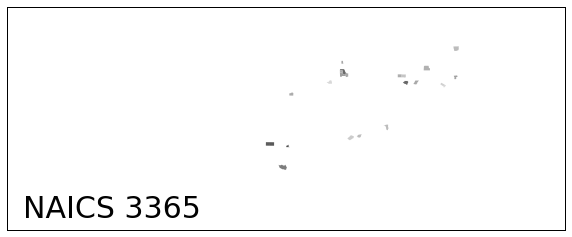

id          x           y                          industry_title  \
92  1121  48.416333  266.567434  NAICS 1121 Cattle ranching and farming   

      color  presence color_mfg_srv  
92  #f10800  True      #D3D3D3

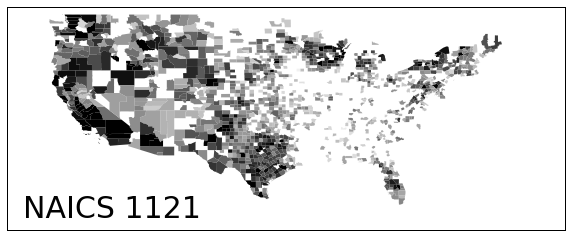

id          x           y                         industry_title  \
260  1113  31.704011  249.121151  NAICS 1113 Fruit and tree nut farming   

       color  presence color_mfg_srv  
260  #f10800  True      #D3D3D3

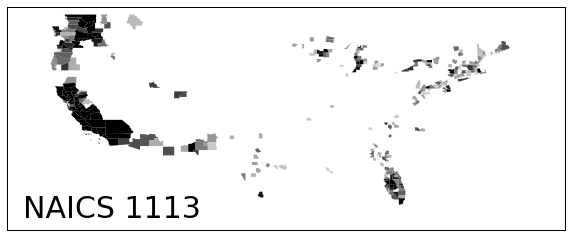

id         x           y                 industry_title    color  \
264  1119  9.451678  294.464845  NAICS 1119 Other crop farming  #f10800   

     presence color_mfg_srv  
264  True      #D3D3D3

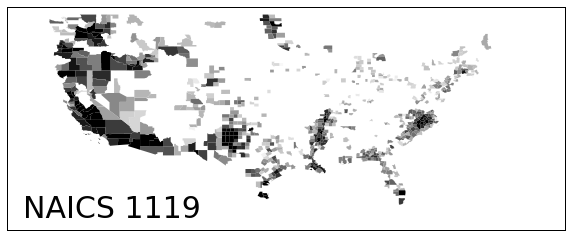

id          x           y  \
45  1151  42.903363  253.713455   

                                       industry_title    color  presence  \
45  NAICS 1151 Support activities for crop production  #f10800  True       

   color_mfg_srv  
45  #D3D3D3

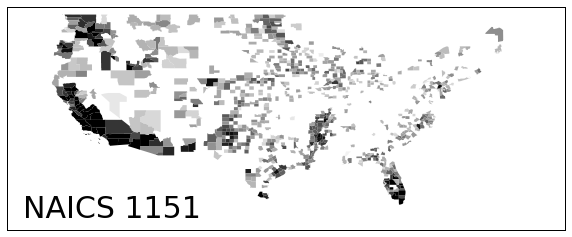

id          x           y                          industry_title  \
261  1112  69.168446  254.181292  NAICS 1112 Vegetable and melon farming   

       color  presence color_mfg_srv  
261  #f10800  True      #D3D3D3

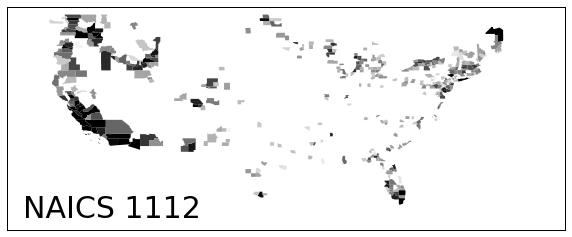

id          x           y                        industry_title  \
183  1111 -15.123271  212.120614  NAICS 1111 Oilseed and grain farming   

       color  presence color_mfg_srv  
183  #ff6800  True      #D3D3D3

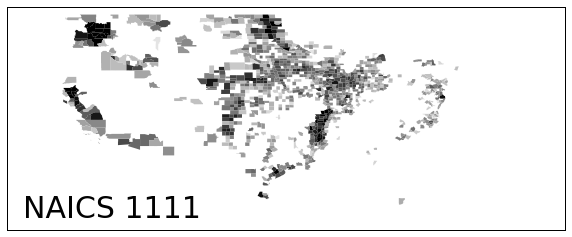

id         x           y                  industry_title    color  \
93  1122  9.833174  233.041849  NAICS 1122 Hog and pig farming  #ff6800   

    presence color_mfg_srv  
93  True      #D3D3D3

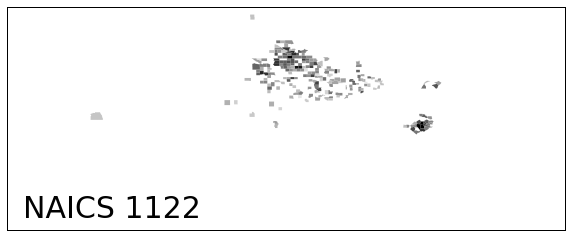

id          x          y               industry_title    color  \
287  2122  13.215483  259.46326  NAICS 2122 Metal ore mining  #ff6800   

     presence color_mfg_srv  
287  True      #D3D3D3

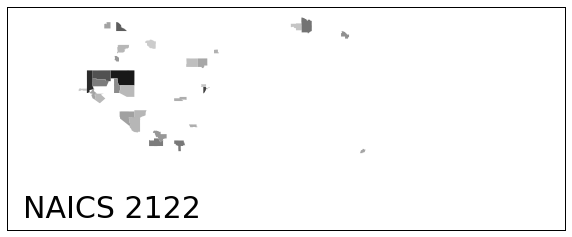

In [147]:
# Choose indus to process...
n = 5
merged = df_agglv_yravg.groupby(level = 1)['annual_avg_estabs'].sum().reset_index().merge(nodes_, left_on = 'industry_code', right_on = 'id')
display_indus = merged.loc[merged.groupby('color')['annual_avg_estabs'].nlargest(n).index.get_level_values(1)]

#Filter original data to have these neighboring industries
df_agglv = df.loc[df.agglvl_code == 76]

df_agglv_yravg = df_agglv.groupby(['area_fips', 'industry_code']).mean().drop(['agglvl_code','year'], axis = 1)
# df_indu_prc_area = df_agglv_yravg.groupby(level=0).apply(lambda x: 100 * x / x.sum())
df_indu_prc_area = log10(df_agglv_yravg)

df_ = df_indu_prc_area.reset_index()

i = 0
open('./Figures/7_compo_USA_nw/labels.txt', 'w').close()
for color in nodes_.color.unique():
  
    cluster_ids = nodes_.loc[nodes_.color == color]['id']
    node_ids = cluster_ids.values
    
    df_neigh = df_.loc[df_.industry_code.isin(nodes_.loc[nodes_.id.isin(node_ids)]['id'].values)]
    df_neigh = df_neigh.set_index('area_fips')
    
    counties_ = counties.set_index('area_fips').reindex(df_neigh.index)[['geometry']]
    gdf = gpd.GeoDataFrame(pd.concat([df_neigh, counties_], axis = 1, sort = True).dropna())

    # Sample of cluster color
    rgb_tuple = tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))
    im = Image.new('RGBA', (20, 20), rgb_tuple)
    im.save('./Figures/7_compo_USA_nw/cp_'+str(i)+'.png')

    for naics in display_indus['industry_code'].values:
        if( gdf.loc[gdf.industry_code == naics]['annual_avg_estabs'].mean() > .2 ):#& (i <=5): # Dismiss small indus
            node_info = nodes_.loc[nodes_.id == naics]
            
            # send node labels to test (they will then go to svg of figure)
            with open('./Figures/7_compo_USA_nw/labels.txt', 'a') as f:
                f.write(node_info['industry_title'].values[0]+'\n')
            display(node_info)
            display(HTML(cl.to_html( [rgb_tuple] )))

            ax = gdf.loc[gdf.industry_code == naics].plot(
                column='annual_avg_estabs', cmap=plt.cm.gist_yarg, vmin = 0, vmax = 1.5, linewidth = 0, figsize = (10, 6.5))
            ax.set_xlim(-130, -60)
            ax.set_ylim(22, 50)#, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
#             plt.axis('off')
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            plt.text(-128, 23.5, 'NAICS '+str(node_info['id'].values[0]), fontsize=30) # position in lat lon
            plt.savefig('./Figures/7_compo_USA_nw/'+str(node_info['id'].values[0])+'.png', bbox_inches = 'tight')
            plt.show()
    i+=1

In [130]:
# TXT2InkscapeXMLv3.py

# A simple Python 3 script to look through a list of text and
# turn each line into an xml entry for use in Inkscape.
# in this script we will slightly spread the text to allow
# the user a better chance of retaining the order of their
# initial text.  Inkscape can be used to spread it out
# using the Align and Distribute Tool.


ofilenm = './Figures/7_compo_USA_nw/figure.svg'#str(input("What is the filename you wish for output?"))
outfile = open(ofilenm,"w")

ListFlm = './Figures/7_compo_USA_nw/labels.txt'#str(input("What is the name and location of the TXT file to work with?"))

Loctn = 75 #Vertical position to start text insertion
SpacingV = 25  #The vertical spacing between lines.

# The block that follows is the Inkscape standard header.
TextBlockA = '''<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<!-- Created with Inkscape (http://www.inkscape.org/) -->

<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   width="744.09448819"
   height="1052.3622047"
   id="svg2"
   version="1.1"
   inkscape:version="0.48.4 r9939"
   sodipodi:docname="New document 1">
  <defs
     id="defs4" />
  <sodipodi:namedview
     id="base"
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1.0"
     inkscape:pageopacity="0.0"
     inkscape:pageshadow="2"
     inkscape:zoom="0.35"
     inkscape:cx="375"
     inkscape:cy="520"
     inkscape:document-units="px"
     inkscape:current-layer="layer1"
     showgrid="false"
     inkscape:window-width="1280"
     inkscape:window-height="742"
     inkscape:window-x="-2"
     inkscape:window-y="-3"
     inkscape:window-maximized="1" />
  <metadata
     id="metadata7">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
        <dc:title></dc:title>
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <g
     inkscape:label="Layer 1"
     inkscape:groupmode="layer"
     id="layer1">'''

TextBlockB = '''<text\n
        xml:space="preserve"
        style="font-size:20px;font-style:normal;font-weight:normal;line-height:125%;letter-spacing:0px;word-spacing:0px;fill:#000000;fill-opacity:1;stroke:none;font-family:Sans"
        x="93.910118"
        y="'''
TextBlockC = '''id="text2989"
        sodipodi:linespacing="150%"><tspan
            sodipodi:role="line"
            id="tspan2991"
            x="93.910118"
            y="'''

outfile.write(TextBlockA)

# The section that follows is to build the SVG text elements
f = open(ListFlm,"r")
for line in f:
    TXTLine = line.strip()
    Loctn = Loctn + SpacingV
    InsertStrng1 = str(Loctn)+'"\n'
    InsertStrng2= str(Loctn)+'">'+TXTLine+'</tspan></text>\n'
    outfile.write(TextBlockB)
    outfile.write(InsertStrng1)
    outfile.write(TextBlockC)
    outfile.write(InsertStrng2)

# The next section is the close off for the SVG xml.

outfile.write('  </g>\n')
outfile.write('</svg>\n')

outfile.close()
print("Done")

Done


In [127]:
# Choose indus to process...
n = 5
merged = df_agglv_yravg.groupby(level = 1)['annual_avg_estabs'].sum().reset_index().merge(nodes_, left_on = 'industry_code', right_on = 'id')
display_indus = merged.loc[merged.groupby('color')['annual_avg_estabs'].nlargest(n).index.get_level_values(1)]

#Filter original data to have these neighboring industries
df_agglv = df.loc[df.agglvl_code == 76]

df_agglv_yravg = df_agglv.groupby(['area_fips', 'industry_code']).mean().drop(['agglvl_code','year'], axis = 1)
# df_indu_prc_area = df_agglv_yravg.groupby(level=0).apply(lambda x: 100 * x / x.sum())
df_indu_prc_area = log10(df_agglv_yravg)

df_ = df_indu_prc_area.reset_index()

for color in nodes_.color.unique():
  
    cluster_ids = nodes_.loc[nodes_.color == color]['id']
    node_ids = cluster_ids.values
    
    df_neigh = df_.loc[df_.industry_code.isin(nodes_.loc[nodes_.id.isin(node_ids)]['id'].values)]
    df_neigh = df_neigh.set_index('area_fips')
    
    counties_ = counties.set_index('area_fips').reindex(df_neigh.index)[['geometry']]
    gdf = gpd.GeoDataFrame(pd.concat([df_neigh, counties_], axis = 1, sort = True).dropna())
    
    for naics in display_indus['industry_code'].values:
        if( gdf.loc[gdf.industry_code == naics]['annual_avg_estabs'].mean() > .45 ):#& (i <=5): # Dismiss small indus
            display(nodes_.loc[nodes_.id == naics])
            display(HTML(cl.to_html( [tuple(int(color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))] )))

            ax = gdf.loc[gdf.industry_code == naics].plot(
                column='annual_avg_estabs', cmap=plt.cm.gist_yarg, vmin = 0, vmax = 1.5, linewidth = 0, figsize = (10, 6.5))
            ax.set_xlim(-130, -60)
            ax.set_ylim(22, 50)#, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
            plt.show()
            i+=1

id          x           y  \
234  4245 -32.847762  229.037585   

                                        industry_title    color  presence  \
234  NAICS 4245 Farm product raw material merch. whls.  #0000f1  True       

    color_mfg_srv  
234  #D3D3D3

KeyboardInterrupt: 

KeyboardInterrupt: 

### Color by Population Density

In [ ]:
processed_data_path = './../../../../../media/miglesia/Elements/corr_st_data/'

main_tables = pd.concat([pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2011_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2012_2013.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2011.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2012.csv'),
           pd.read_csv('./../../../../../media/miglesia/Elements/corr_st_data/CHI_COM_W4_O4_E2_I4_main_table_2014_2013.csv')])

main_table = main_tables.groupby('CHI ID COM').mean()/2.

# change node names into node index
# main_table.rename(columns = dict(zip(nodes.node_name, nodes.index)), inplace = True)

population = pd.read_csv('./data/pop_dist_comuna.csv').rename(columns = {'comuna_id': 'CHI ID COM'})

In [ ]:
from numpy import log10
population['log_dens'] = log10(population['densidad'])
b = 8; population['log_dens_cat'] = pd.cut(population['log_dens'], b)

bins = pd.cut(population['log_dens'], b, retbins=True)[1]
bins_mean = (bins[1:] + bins[:-1])/2.

merged = pd.concat([population.set_index('CHI ID COM')[['log_dens_cat']].sort_index(), main_table], axis = 1)
popdens_RCA = RCA(merged.groupby('log_dens_cat').sum())

popdens_RCA_normed = popdens_RCA/popdens_RCA.sum()

In [ ]:
nodes_

In [ ]:
# pop_dens_index = pd.DataFrame((popdens_RCA_normed.T*bins_mean).T.sum(), columns = ['pop_dens_index'])
# pop_dens_index = pop_dens_index.reset_index().rename(columns={'index':'id'})
# nodes_ = nodes_.merge(pop_dens_index, on = 'id', how = 'left') # industry_title / node_name
# # nodes_['pop_dens_color_code'] = pd.cut(nodes_['pop_dens_index'], bins = 7, labels=False)

# from numpy import nan
# rainbow_colors = {0:'#9400D3', #Violet
# 1:'#4B0082', #Indigo
# 2:'#0000FF', #Blue
# 3:'#00FF00', #Green
# nan:'#D3D3D3',  #'#D3D3D3', #Gray
# 4:'#FFFF00', #Yellow
# 5:'#FF7F00', #Orange
# 6:'#FF0000'} #Red

# nodes_['color_2'] = pd.DataFrame(nodes_['pop_dens_color_code'].map(rainbow_colors))

# network = '{"nodes": '+nodes_.to_json(orient= 'records')+', "edges": '+links[['index', 'source', 'target']].to_json(orient= 'records')+'}\n'

In [ ]:
ps = d3plus.ProductSpace(
id="name",
name="node_name",
color="color_2",
graph_data=network,
presence="presence",
edge_property="edges",
network_id="id")
ps.draw(nodes_)

In [ ]:
plt.hist(edges.weight_CHI_COM.values, 50)
plt.hist(edges_max_d.weight_CHI_COM.values, 50)
plt.show()